In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
# import kagglehub
import io

# from google.colab import files
# from PIL import Image

2025-12-15 22:44:54.337493: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Matplotlib is building the font cache; this may take a moment.


In [ ]:
path = "lung_image_sets"

print("Path dataset:", path)

Path dataset: lung_image_sets/


In [3]:
contents = os.listdir(path)
print(f"Isi direktori 'lung_image_sets':\n {contents}")

Isi direktori 'lung_image_sets':
 ['lung_aca', 'lung_n', 'lung_scc']


In [7]:
class_folders = os.listdir(path)
print(f"Folder kelas di dalam 'lung_image_sets': {class_folders}")

# class_names = ['lung_n', 'lung_scc', 'lung_aca']

for folder in class_folders:
    folder_path = path + '/' + folder
    num_files = len(os.listdir(folder_path))
    print(f"- Jumlah gambar di folder '{folder}': {num_files}")

Folder kelas di dalam 'lung_image_sets': ['lung_aca', 'lung_n', 'lung_scc']
- Jumlah gambar di folder 'lung_aca': 5000
- Jumlah gambar di folder 'lung_n': 5000
- Jumlah gambar di folder 'lung_scc': 5000


In [15]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMG_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH)
BATCH_SIZE = 100
EPOCHS = 5


In [16]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 15000 files belonging to 3 classes.
Using 12000 files for training.
Found 15000 files belonging to 3 classes.
Using 3000 files for validation.


In [17]:
class_names = train_dataset.class_names
print("\nNama kelas:", class_names)
print(f"Jumlah kelas: {len(class_names)}")


Nama kelas: ['lung_aca', 'lung_n', 'lung_scc']
Jumlah kelas: 3


2025-12-15 23:37:42.496978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


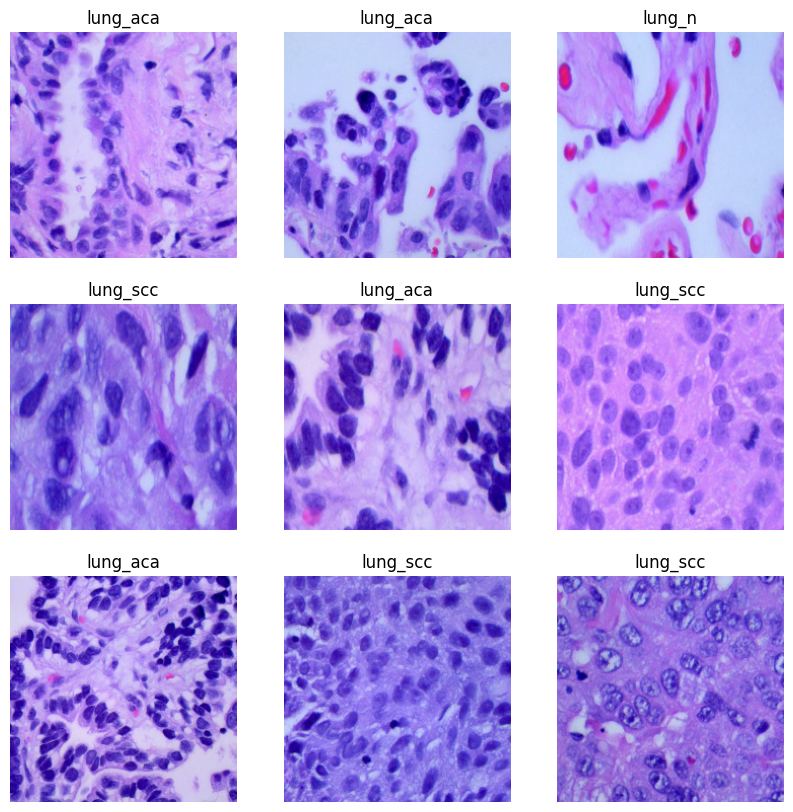

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.show()

In [19]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

inputs = tf.keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [21]:
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=EPOCHS
)

print("\ndone.")

Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.8094 - loss: 0.4432 - val_accuracy: 0.8913 - val_loss: 0.2684
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 402s 3s/step - accuracy: 0.8878 - loss: 0.2718 - val_accuracy: 0.9073 - val_loss: 0.2298
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.9003 - loss: 0.2411 - val_accuracy: 0.9123 - val_loss: 0.2115
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.9023 - loss: 0.2311 - val_accuracy: 0.9037 - val_loss: 0.2219
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.9079 - loss: 0.2174 - val_accuracy: 0.9173 - val_loss: 0.1982

done.


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

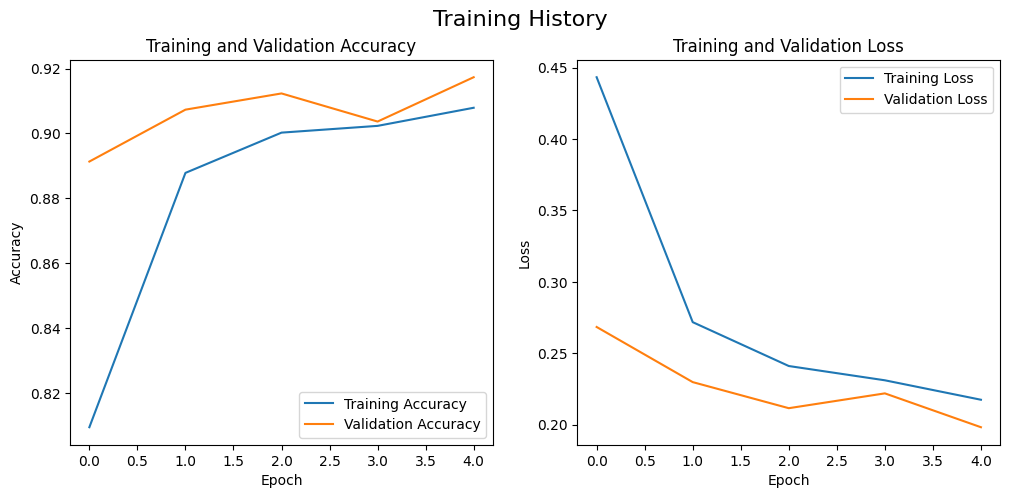

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.suptitle('Training History', fontsize=16)
plt.show()

In [24]:
loss, accuracy = model.evaluate(validation_dataset)

print("\nHasil Evaluasi Akhir")
print(f"Loss pada data validasi: {loss:.4f}")
print(f"Akurasi pada data validasi: {accuracy:.4f} ({accuracy:.2%})")

30/30 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9173 - loss: 0.1982

Hasil Evaluasi Akhir
Loss pada data validasi: 0.1982
Akurasi pada data validasi: 0.9173 (91.73%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


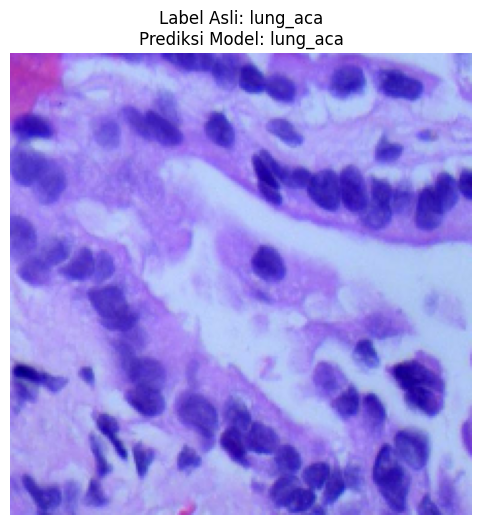

Probabilitas Prediksi (Softmax Output):
- lung_aca: 0.9152 (91.52%)
- lung_n: 0.0189 (1.89%)
- lung_scc: 0.0659 (6.59%)


2025-12-16 00:12:16.306242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
for image_batch, label_batch in validation_dataset.take(1):
    first_image = image_batch[0]
    true_label_index = label_batch[0].numpy()

    image_for_prediction = tf.expand_dims(first_image, 0)

    predictions = model.predict(image_for_prediction)
    predicted_label_index = np.argmax(predictions)

    true_class_name = class_names[true_label_index]
    predicted_class_name = class_names[predicted_label_index]

    plt.figure(figsize=(6, 6))
    plt.imshow(first_image.numpy().astype("uint8"))
    plt.title(f"Label Asli: {true_class_name}\nPrediksi Model: {predicted_class_name}")
    plt.axis("off")
    plt.show()

    print("Probabilitas Prediksi (Softmax Output):")
    for i in range(len(class_names)):
        print(f"- {class_names[i]}: {predictions[0][i]:.4f} ({predictions[0][i]:.2%})")

In [27]:
model.save('models/lung_cancer_model.keras')